# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Data collection

In [2]:
df=pd.read_csv('C:\\Users\\Dell\\Desktop\\Data Science\\big mart data.csv')

In [3]:
df.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3289,DRD49,9.895,LF,0.167831,Soft Drinks,237.4564,OUT046,1997,Small,Tier 1,Supermarket Type1,715.0692
142,NCO55,12.800,Low Fat,0.091222,Others,105.5938,OUT045,2002,NaN,Tier 2,Supermarket Type1,2143.8760
3098,FDY02,NaN,Regular,0.087221,Dairy,263.9910,OUT027,1985,Medium,Tier 3,Supermarket Type3,9467.6760
3249,FDD59,NaN,Regular,0.065860,Starchy Foods,81.8960,OUT027,1985,Medium,Tier 3,Supermarket Type3,1677.8160
8366,FDG52,13.650,Low Fat,0.065618,Frozen Foods,47.6402,OUT035,2004,Small,Tier 2,Supermarket Type1,459.4020


In [4]:
df.shape

(8523, 12)

In [5]:
print('The Number of Rows',df.shape[0])
print('The Number of Columns',df.shape[1])

The Number of Rows 8523
The Number of Columns 12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df["Item_Weight"].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

# Handling Missing Values

In [9]:
# Replace the item - weight column by mean

In [10]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace=True)

In [11]:
# Repalce the outlet _size column by mode beacues it is categoical data

In [12]:
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
df["Outlet_Size"]=df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0])

In [14]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Exploratory Data Analysis (EDA)

In [15]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


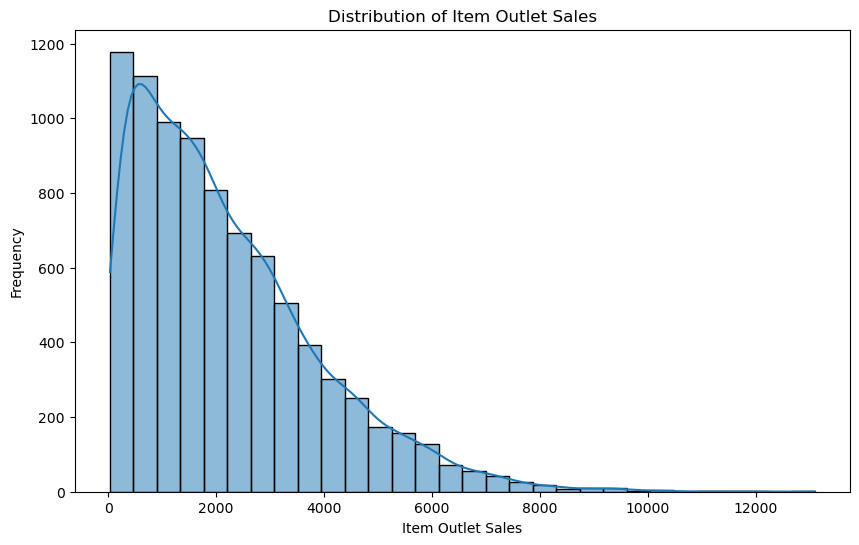

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Item_Outlet_Sales'], bins=30, kde=True)
plt.title("Distribution of Item Outlet Sales")
plt.xlabel("Item Outlet Sales")
plt.ylabel("Frequency")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


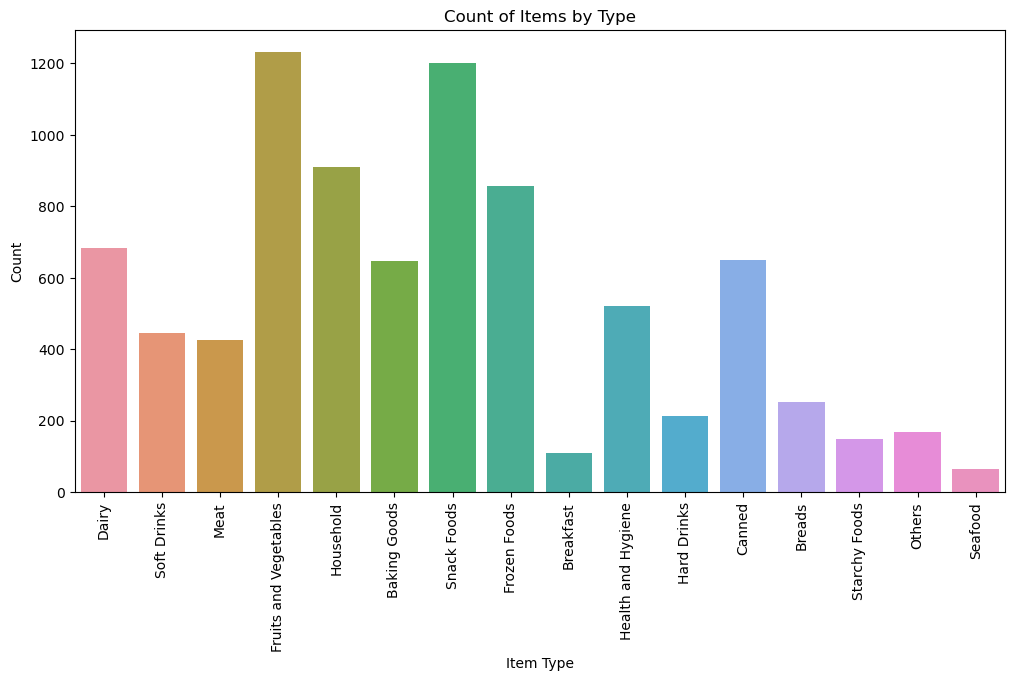

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(df['Item_Type'])
plt.title("Count of Items by Type")
plt.xlabel("Item Type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

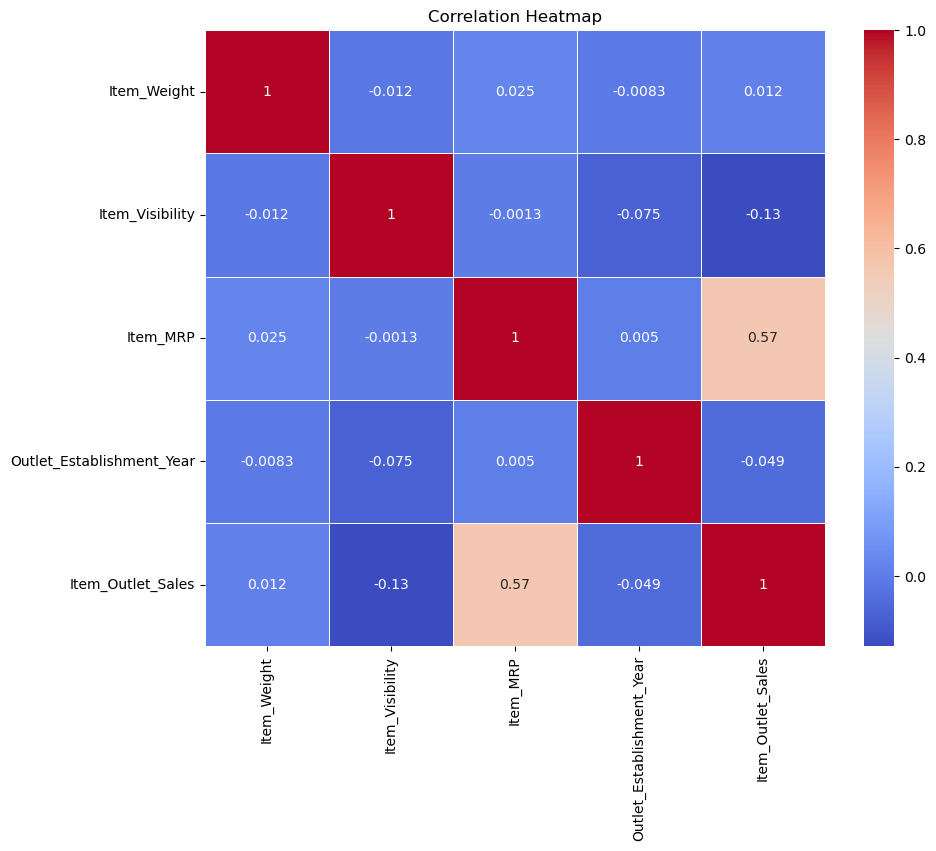

In [18]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


<AxesSubplot:>

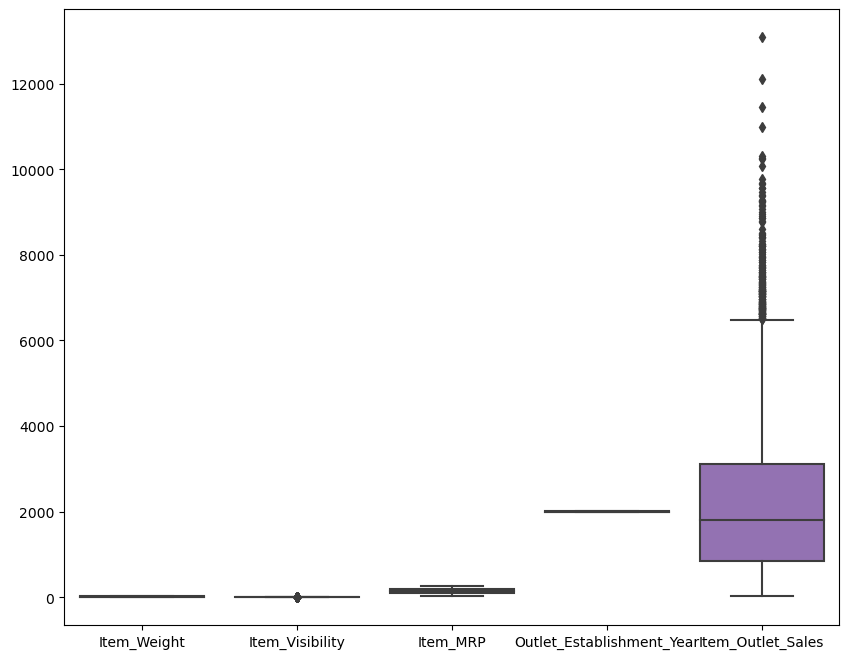

In [19]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)

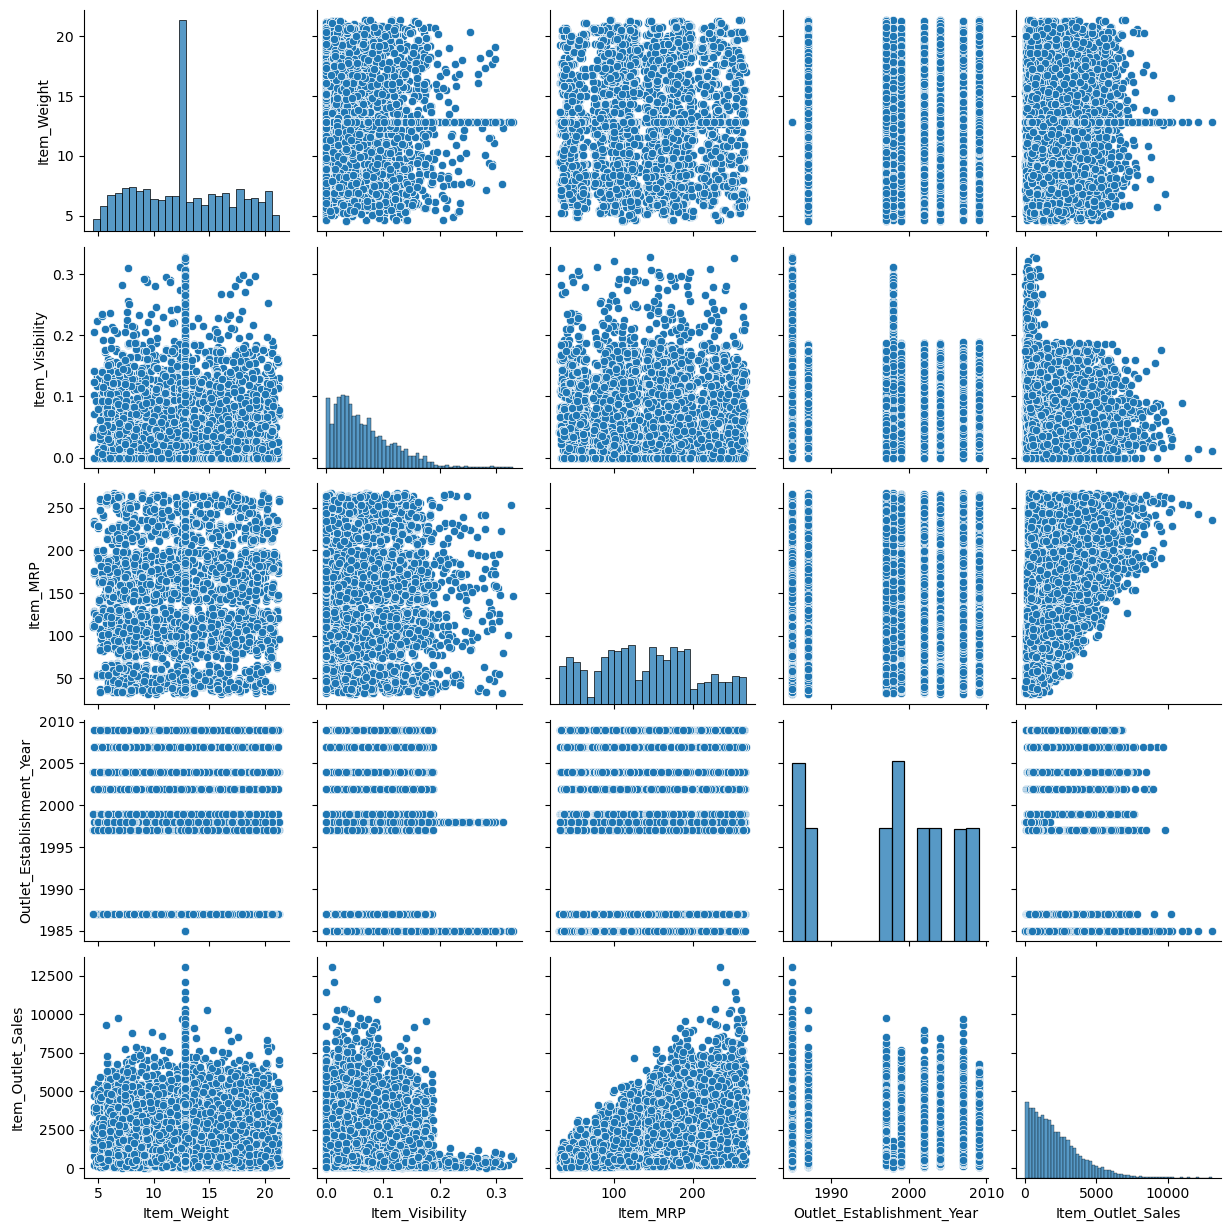

In [20]:
sns.pairplot(data=df)
plt.show()

# Label Encoding

In [21]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [22]:
df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [23]:
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [24]:
encoder=LabelEncoder()

In [25]:
df["Item_Fat_Content"]=encoder.fit_transform(df["Item_Fat_Content"])
df["Item_Identifier"]=encoder.fit_transform(df["Item_Identifier"])
df["Item_Type"]=encoder.fit_transform(df["Item_Type"])
df["Outlet_Identifier"]=encoder.fit_transform(df["Outlet_Identifier"])
df["Outlet_Size"]=encoder.fit_transform(df["Outlet_Size"])
df["Outlet_Location_Type"]=encoder.fit_transform(df["Outlet_Location_Type"])
df["Outlet_Type"]=encoder.fit_transform(df["Outlet_Type"])

In [26]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [27]:
# Splitting the data into dependent and independent variables

In [28]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [29]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [50]:
x = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

In [51]:
print(x)
print(y)

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0           9.300                 0         0.016047          4  249.8092   
1           5.920                 1         0.019278         14   48.2692   
2          17.500                 0         0.016760         10  141.6180   
3          19.200                 1         0.000000          6  182.0950   
4           8.930                 0         0.000000          9   53.8614   
...           ...               ...              ...        ...       ...   
8518        6.865                 0         0.056783         13  214.5218   
8519        8.380                 1         0.046982          0  108.1570   
8520       10.600                 0         0.035186          8   85.1224   
8521        7.210                 1         0.145221         13  103.1332   
8522       14.800                 0         0.044878         14   75.4670   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  
0               1   

# Data Standardization

In [32]:
# Splitting The into Training And Testing

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [53]:
print(x.shape,x_train.shape,x_test.shape)

(8523, 8) (6818, 8) (1705, 8)


In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
model1 = RandomForestRegressor(n_estimators=100, random_state=42)

In [59]:
model1.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [60]:
model1.score(x_train,y_train)

0.9372793564939694